In [27]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta as td
import pandas as pd
%matplotlib inline
import sys
print(sys.path)
#Make sure Python Analysis folder in in PYTHONPATH and import the MHDpy module
PythonAnalysisPath = 'C:\\Users\\aspit\\Git\\MHDLab\\Python Analysis'
if not PythonAnalysisPath in sys.path:
    sys.path.append(PythonAnalysisPath)
import MHDpy.importing as importing
import MHDpy.plotting as plotting
import MHDpy.analysis as analysis
import MHDpy.SPEparse as SPEparse
from nptdms import TdmsFile as TF

import importlib

mpl.rcParams.update({'font.size': 18})
    

['', 'C:\\Users\\aspit\\AppData\\Local\\Continuum\\anaconda3\\python36.zip', 'C:\\Users\\aspit\\AppData\\Local\\Continuum\\anaconda3\\DLLs', 'C:\\Users\\aspit\\AppData\\Local\\Continuum\\anaconda3\\lib', 'C:\\Users\\aspit\\AppData\\Local\\Continuum\\anaconda3', 'C:\\Users\\aspit\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages', 'C:\\Users\\aspit\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\aspit\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\aspit\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\aspit\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\aspit\\.ipython', 'C:\\Users\\aspit\\Documents\\Git\\MHDLab\\Python Analysis', 'C:\\Users\\aspit\\Documents\\Git\\MHDLab\\Python Analysis\\', 'C:\\Users\\aspit\\Documents\\Git\\MHDLab\\Python Analysis\\MHDpy', 'C:\\Users\\aspit\\Git\\MHDLab\\Python Analysis']


In [66]:
#spefilepath = "C:/Users/aspit/Documents/TestData/Test.spe"
        
laserseries = SPEparse.getlaserdata()
    
folder = "C:/Users/aspit/OneDrive/Data/Pvskt/"

Film2_100aq= SPEparse.SPE2df_seq_spect(folder + "Film2/TR_100aq_newbg_int70.spe")    
Film2_1000aq = SPEparse.SPE2df_seq_spect(folder + "Film2/TR_1000aq_newbg_int70.spe")
Film2_100aq_2= SPEparse.SPE2df_seq_spect(folder + "Film2/TR_100aq_newbg_int70_2.spe")    


Film1_fullrange= SPEparse.SPE2df_seq_spect(folder + "Film1/Integrated_fullrange_2.spe")  

Film2_1000aq = Film2_1000aq/10

Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object


Text(0,0.5,'PL intensity (counts)')

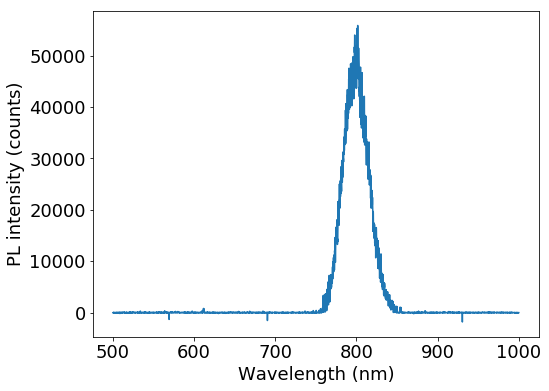

In [63]:
importlib.reload(MHDpy.SPEparse)

Fullrangeplot = SPEparse.SpectraPlot(Film1_fullrange, Film1_fullrange.index)

Fullrangeplot.ax1.set_ylabel("PL intensity (counts)")

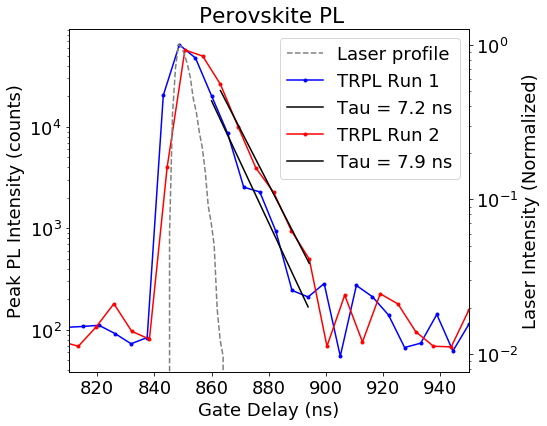

In [157]:
importlib.reload(MHDpy.SPEparse)

PLplot = SPEparse.PLplot_new( laserseries)



PLplot.fig.suptitle('Perovskite PL', y = 1)
PLplot.ax1.set_ylabel('Peak PL Intensity (counts)')
PLplot.ax1.set_xlim((810,950))


Fit_Film2_100aq,Gatedelays_Fit_Film2_100aq, fitcoef_Film2_100aq  = SPEparse.fitdecay(Film2_100aq, wl1_fit = 860, wl2_fit = 900)
Fit_Film2_100aq_2,Gatedelays_Fit_Film2_100aq_2, fitcoef_Film2_100aq_2  = SPEparse.fitdecay(Film2_100aq_2, wl1_fit = 860, wl2_fit = 900)

Tau1 = -1/fitcoef_Film2_100aq[0]
Tau1_str = "{:.1f}".format(Tau1)
Tau2 = -1/fitcoef_Film2_100aq_2[0]
Tau2_str = "{:.1f}".format(Tau2)

PLplot.add_decay(Film2_100aq, "TRPL Run 1", color = 'b')

ln1 = PLplot.ax1.plot(Gatedelays_Fit_Film2_100aq,Fit_Film2_100aq, color = 'black', label = ("Tau = " +Tau1_str + " ns") )


PLplot.lns = PLplot.lns + ln1
PLplot.setlegend()
PLplot.add_decay(Film2_100aq_2, "TRPL Run 2", color = 'r')

ln2 = PLplot.ax1.plot(Gatedelays_Fit_Film2_100aq_2,Fit_Film2_100aq_2, color = 'black', label = ("Tau = " +Tau2_str + " ns"))

PLplot.lns = PLplot.lns + ln2
PLplot.setlegend()

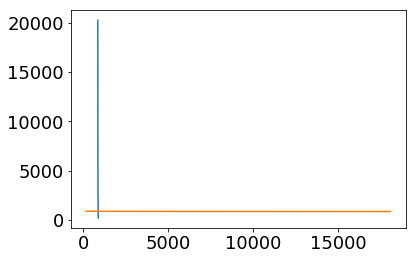

In [123]:
plt.plot(gatedelays,maximums)
plt.plot(Fit_Film2_100aq,Gatedelays_Fit_Film2_100aq)


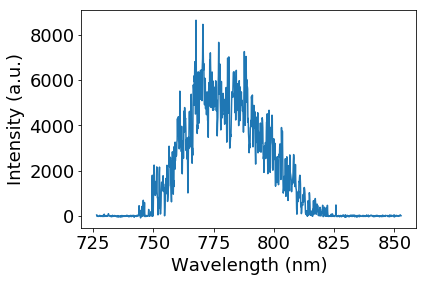

In [51]:
spectra_Film2_100aq = Film2_100aq[Film2_100aq.columns[17]]
spectra_Film2_1000aq = Film2_1000aq[Film2_1000aq.columns[17]]

SPEparse.SpectraPlot(spectra_Film2_100aq, spectra_Film2_100aq.index)